In [1]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [2]:


file_path = './Crime_Data_from_2020_to_Present (1).csv'
crime_data = pd.read_csv(file_path)

crime_data.head()


DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0   10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM      2230     3   
1  190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM       330     1   
2  200110444  04/14/2020 12:00:00 AM  02/13/2020 12:00:00 AM      1200     1   
3  191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM      1730    15   
4  191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM       415    19   

     AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0    Southwest          377         2     624   
1      Central          163         2     624   
2      Central          155         2     845   
3  N Hollywood         1543         2     745   
4      Mission         1998         2     740   

                                         Crm Cd Desc  ... Status  \
0                           BATTERY - SIMPLE ASSAULT  ...     AO   
1                           BATTERY - SIMPLE ASSAULT  ...     IC   
2          SEX OFFENDER REGISTRANT OUT OF COMPLIANCE  ...     AA   
3           VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...     IC   
4  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...     IC   

    Status Desc Crm Cd 1 Crm Cd 2  Crm Cd 3 Crm Cd 4  \
0   Adult Other    624.0      NaN       NaN      NaN   
1   Invest Cont    624.0      NaN       NaN      NaN   
2  Adult Arrest    845.0      NaN       NaN      NaN   
3   Invest Cont    745.0    998.0       NaN      NaN   
4   Invest Cont    740.0      NaN       NaN      NaN   

                                   LOCATION Cross Street      LAT       LON  
0   1100 W  39TH                         PL          NaN  34.0141 -118.2978  
1    700 S  HILL                         ST          NaN  34.0459 -118.2545  
2    200 E  6TH                          ST          NaN  34.0448 -118.2474  
3   5400    CORTEEN                      PL          NaN  34.1685 -118.4019  
4  14400    TITUS                        ST          NaN  34.2198 -118.4468  

[5 rows x 28 columns]

## 1.  Trend Analysis

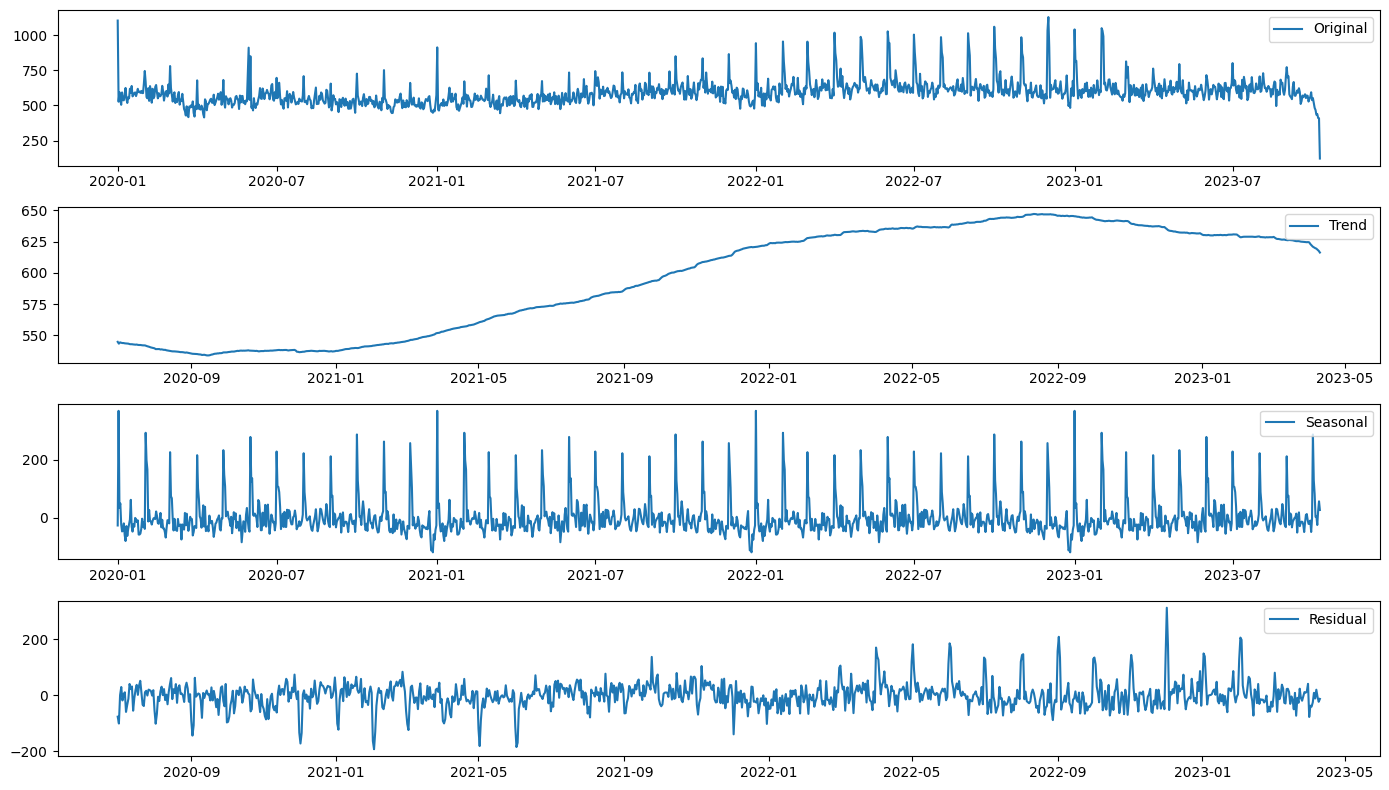

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

crime_data['DATE OCC'] = pd.to_datetime(crime_data['DATE OCC'])

daily_crime_counts = crime_data.groupby('DATE OCC').size()

decomposition = seasonal_decompose(daily_crime_counts, model='additive', period=365)


plt.figure(figsize=(14, 8))
plt.subplot(411)
plt.plot(daily_crime_counts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


Peak Analysis

In [4]:
seasonal_component = decomposition.seasonal

peaks = seasonal_component[seasonal_component == seasonal_component.max()]
troughs = seasonal_component[seasonal_component == seasonal_component.min()]

peak_dates = peaks.index
trough_dates = troughs.index

peak_dates, trough_dates


(DatetimeIndex(['2020-01-02', '2021-01-01', '2022-01-01', '2023-01-01'], dtype='datetime64[ns]', name='DATE OCC', freq=None),
 DatetimeIndex(['2020-12-27', '2021-12-27', '2022-12-27'], dtype='datetime64[ns]', name='DATE OCC', freq=None))

In [18]:
def change_to_time(a):
    s = str(a).zfill(4)  # Pad with zeros to ensure 4 characters
    h = s[:2]
    if int(h) > 23:  # Reset hours greater than 23 to 00
        h = "00"
    return h + ":" + s[2:]




/tmp/ipykernel_1347865/55481686.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE_OCC'] = pd.to_datetime(df['DATE_OCC'])


[None]

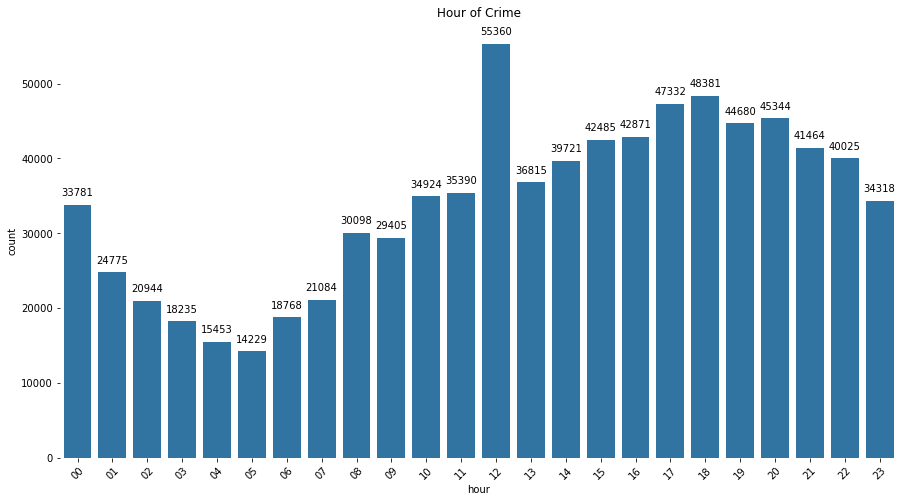

In [19]:

df= pd.read_csv(file_path)
df.columns = df.columns.str.replace(" ","_")
df['DATE_OCC'] = pd.to_datetime(df['DATE_OCC'])
df['TIME_OCC'] = df['TIME_OCC'].apply(change_to_time)

df['len_time'] = df['TIME_OCC'].apply( lambda x: len(str(x)))
df['hour'] = df['TIME_OCC'].apply(lambda x: x[:2])
df['min'] = df['TIME_OCC'].apply( lambda x: (str(x[3:])))
df['month'] = df['DATE_OCC'].apply( lambda x: x.month)
df['day'] = df['DATE_OCC'].apply( lambda x: x.day)
df['year'] = df['DATE_OCC'].apply( lambda x: x.year)
df.sort_values('hour', ascending = True, inplace= True)
plt.figure(figsize=(15,8))
a = sns.countplot(x=df['hour'])
plt.title("Distribution of age affected by crime")
plt.xticks(rotation=45)
plt.bar_label(a.containers[0],padding=7.0)
plt.title("Hour of Crime")

a.set(frame_on=False)

[None]

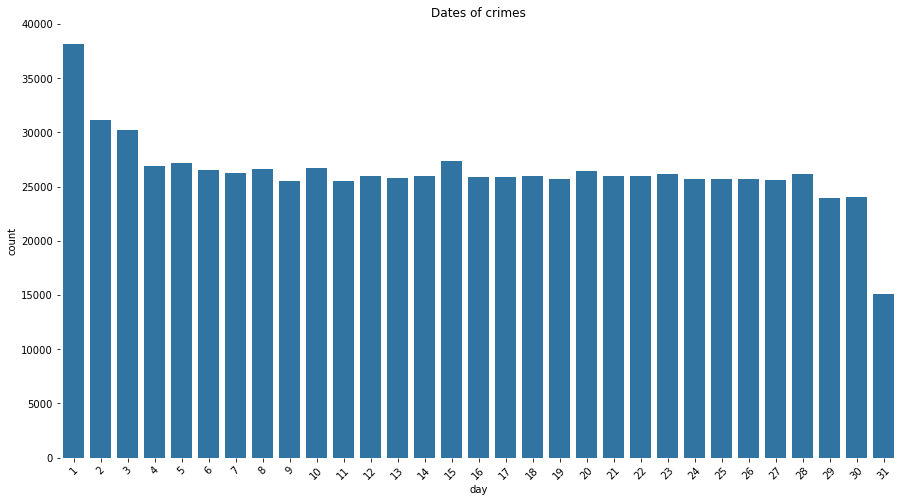

In [20]:
dd = df.groupby(df['DATE_OCC'],as_index=False)['DR_NO'].agg('count')
plt.figure(figsize=(15,8))
a = sns.countplot(x=df['day'])

plt.xticks(rotation=45)
plt.title("Dates of crimes")
a.set(frame_on=False)

## 2. Correlation Analysis

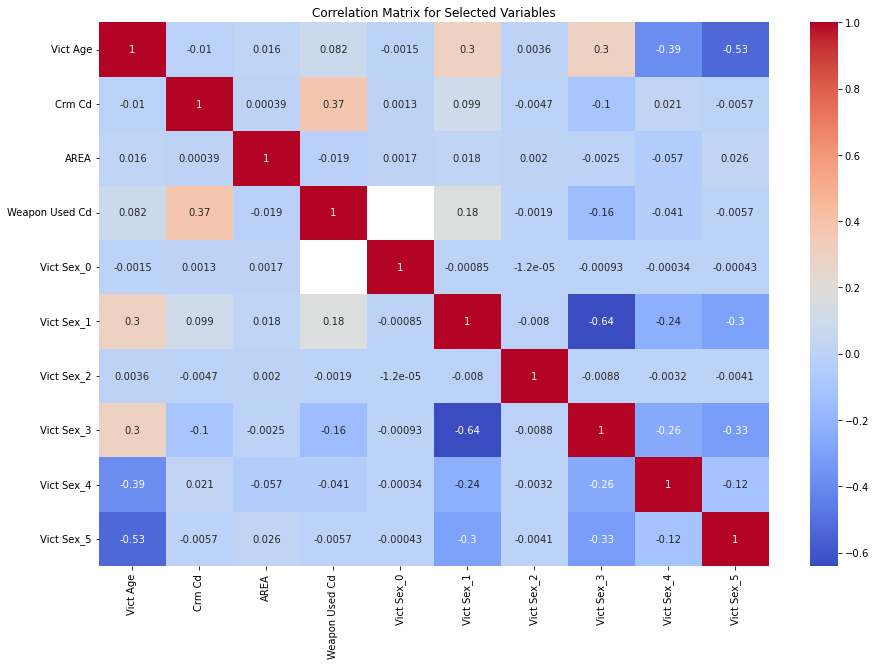

In [36]:


df = crime_data[['Vict Age', 'Vict Sex',  'Crm Cd', 'AREA', 'Weapon Used Cd']]

df  = pd.get_dummies(df , columns=['Vict Sex'], prefix_sep='_')

corr_matrix = df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Selected Variables')
plt.show()


## 3. Geospatial Pattern

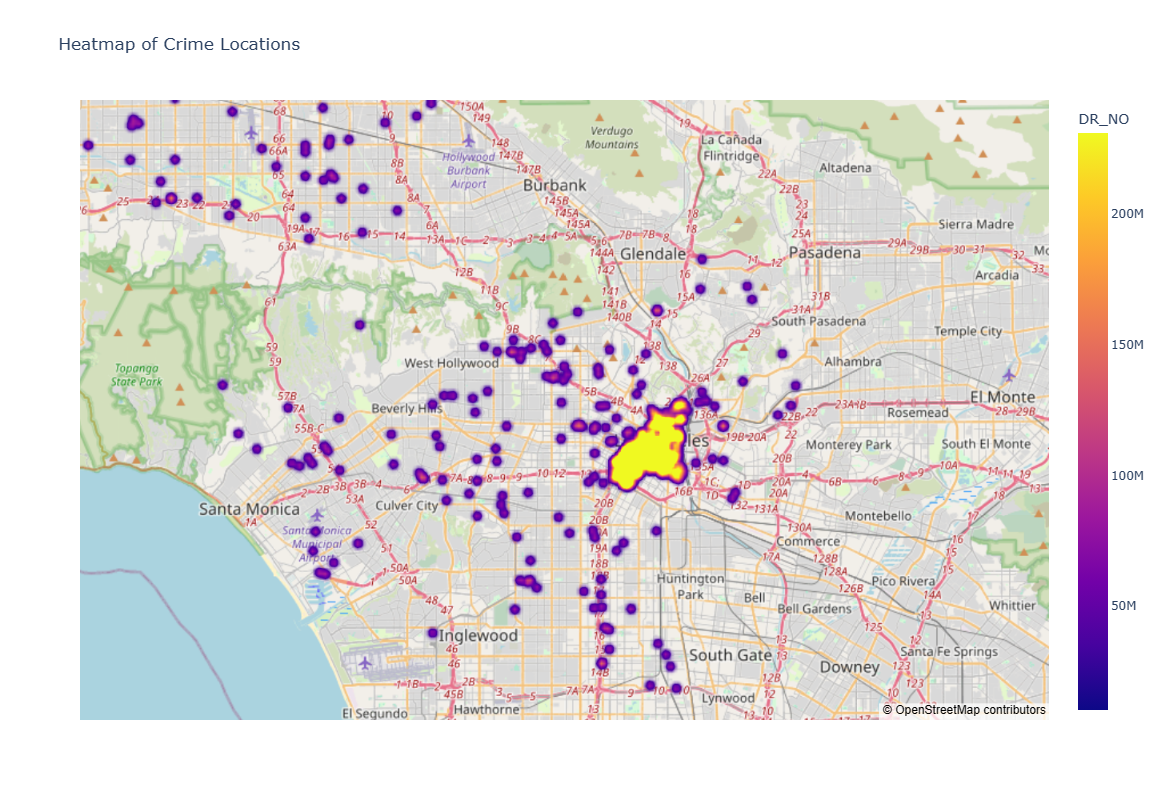

In [37]:
fig = px.density_mapbox(crime_data.head(1000), lat = 'LAT', lon = 'LON', z = 'DR_NO',
                        radius = 8,
                        center = dict(lat =34.0545 , lon =   -118.3031),
                        zoom = 10,
                        mapbox_style = 'open-street-map',
                        width=1100,
                        height=800,
                        title="Heatmap of Crime Locations"
                        )

fig.show()

/tmp/ipykernel_1347865/1872601402.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




[None]

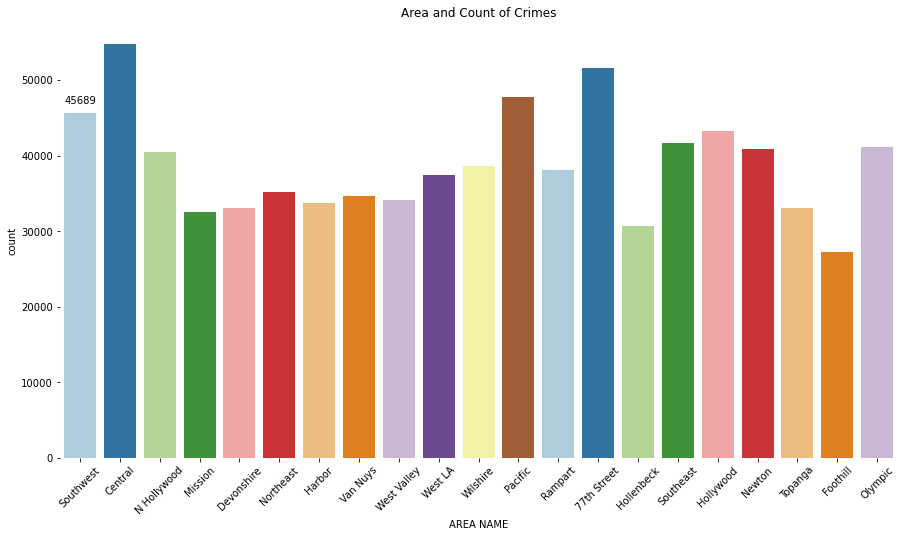

In [43]:
plt.figure(figsize=(15,8))
a = sns.countplot(x=crime_data['AREA NAME'],palette="Paired")
plt.title("Distribution of age affected by crime")
plt.xticks(rotation=45)
plt.bar_label(a.containers[0],padding=7.0)
plt.title("Area and Count of Crimes")
a.set(frame_on=False)

## 4. Predictive Modeling

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder


model_data = crime_data[['AREA', 'TIME OCC', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Crm Cd']].dropna()


label_encoders = {}
categorical_columns = ['Vict Sex', 'Vict Descent', 'AREA'] 
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    crime_data[column] = label_encoders[column].fit_transform(crime_data[column])


features = ['AREA', 'TIME OCC', 'Vict Age', 'Vict Sex', 'Vict Descent']  
target = 'Crm Cd'  # The crime code




In [5]:
X = crime_data[features]
y = crime_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Initialize models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
lr_model = LogisticRegression(random_state=42)

trained_models = {}
model_metrics = {}

for model in [rf_model, lr_model]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    trained_models[model.__class__.__name__] = model
    

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    model_metrics[model.__class__.__name__] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
from sklearn.neighbors import KNeighborsClassifier


knn_model = KNeighborsClassifier(n_neighbors=5)


knn_model.fit(X_train, y_train)


y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted', zero_division=0)
recall_knn = recall_score(y_test, y_pred_knn, average='weighted', zero_division=0)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted', zero_division=0)


trained_models['KNeighborsClassifier'] = knn_model
model_metrics['KNeighborsClassifier'] = {'Accuracy': accuracy_knn, 'Precision': precision_knn, 'Recall': recall_knn, 'F1 Score': f1_knn}


model_metrics['KNeighborsClassifier']



{'Accuracy': 0.18673537480536814,
 'Precision': 0.17242426611907405,
 'Recall': 0.18673537480536814,
 'F1 Score': 0.1702363368243033}

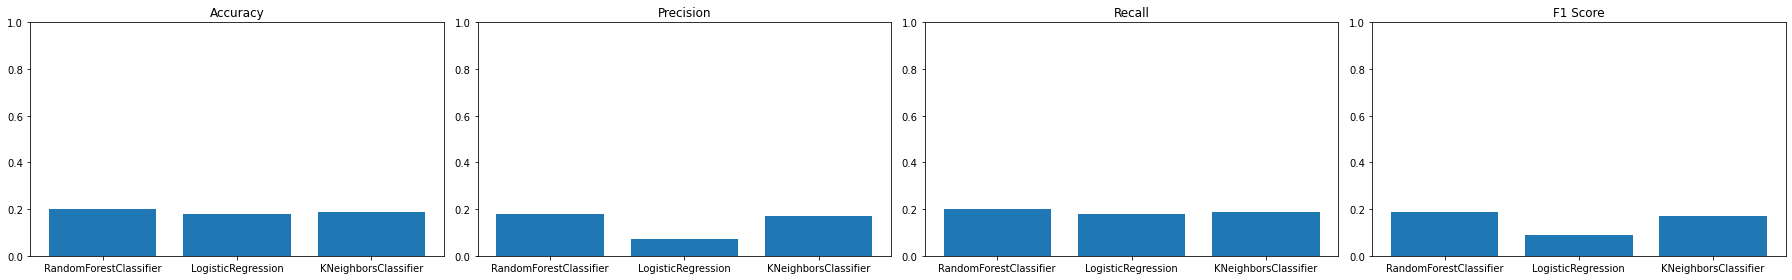

In [48]:
import matplotlib.pyplot as plt

metrics = list(model_metrics[next(iter(model_metrics))].keys())
fig, axes = plt.subplots(nrows=1, ncols=len(metrics), figsize=(25, 4))

for i, metric in enumerate(metrics):
    values = [model_metrics[model_name][metric] for model_name in model_metrics]
    axes[i].bar(model_metrics.keys(), values)
    axes[i].set_title(metric)
    axes[i].set_ylim(0, 1)  # Since metrics are between 0 and 1

plt.tight_layout()
plt.show()


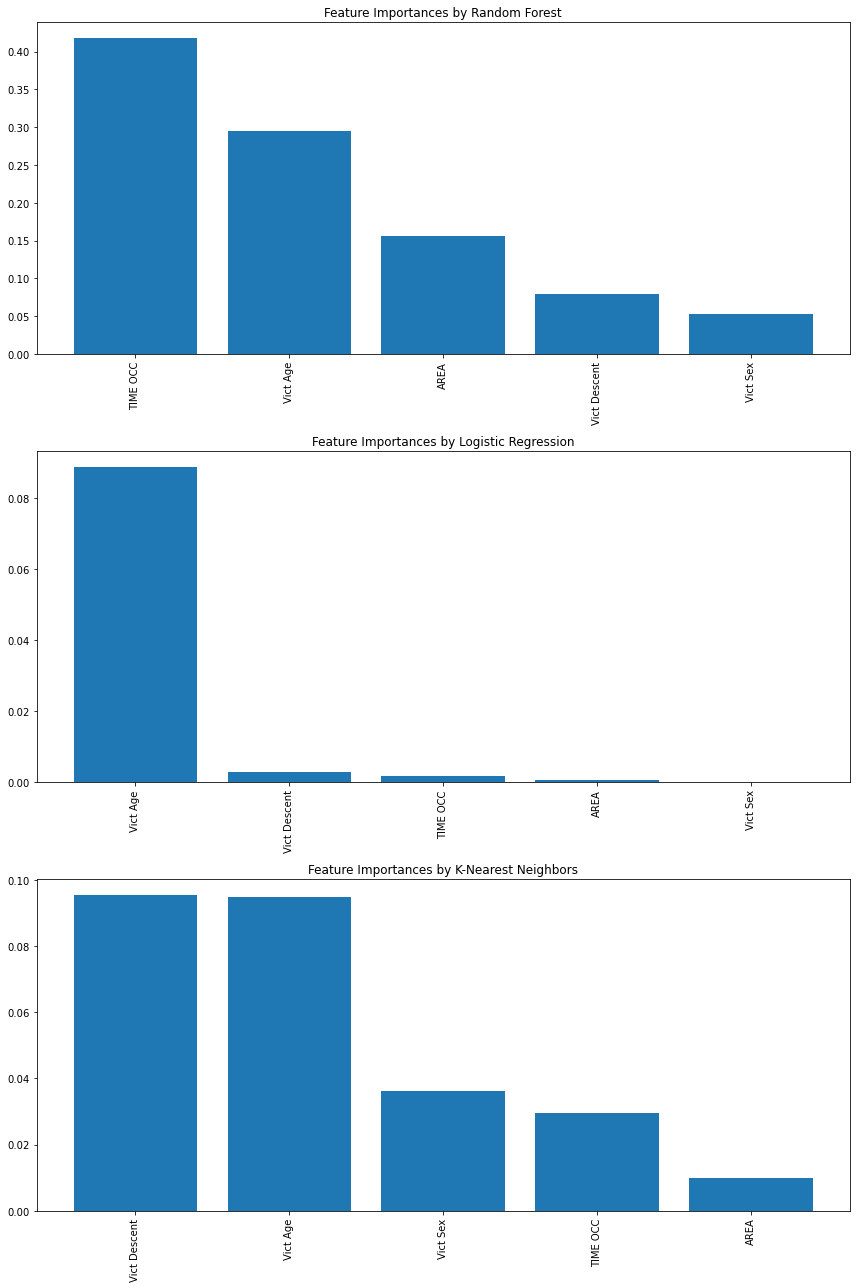

In [51]:
from sklearn.inspection import permutation_importance

importances_rf = rf_trained_model.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]

lr_trained_model = trained_models['LogisticRegression']
importances_lr = permutation_importance(lr_trained_model, X_test, y_test, n_repeats=30, random_state=42)
indices_lr = np.argsort(importances_lr.importances_mean)[::-1]

knn_trained_model = trained_models['KNeighborsClassifier']
importances_knn = permutation_importance(knn_trained_model, X_test, y_test, n_repeats=30, random_state=42)
indices_knn = np.argsort(importances_knn.importances_mean)[::-1]

fig, axes = plt.subplots(3, 1, figsize=(12, 18))

axes[0].bar(range(X_train.shape[1]), importances_rf[indices_rf])
axes[0].set_title("Feature Importances by Random Forest")
axes[0].set_xticks(range(X_train.shape[1]))
axes[0].set_xticklabels(X_train.columns[indices_rf], rotation=90)

axes[1].bar(range(X_train.shape[1]), importances_lr.importances_mean[indices_lr])
axes[1].set_title("Feature Importances by Logistic Regression")
axes[1].set_xticks(range(X_train.shape[1]))
axes[1].set_xticklabels(X_train.columns[indices_lr], rotation=90)
axes[2].bar(range(X_train.shape[1]), importances_knn.importances_mean[indices_knn])
axes[2].set_title("Feature Importances by K-Nearest Neighbors")
axes[2].set_xticks(range(X_train.shape[1]))
axes[2].set_xticklabels(X_train.columns[indices_knn], rotation=90)

plt.tight_layout()
plt.show()



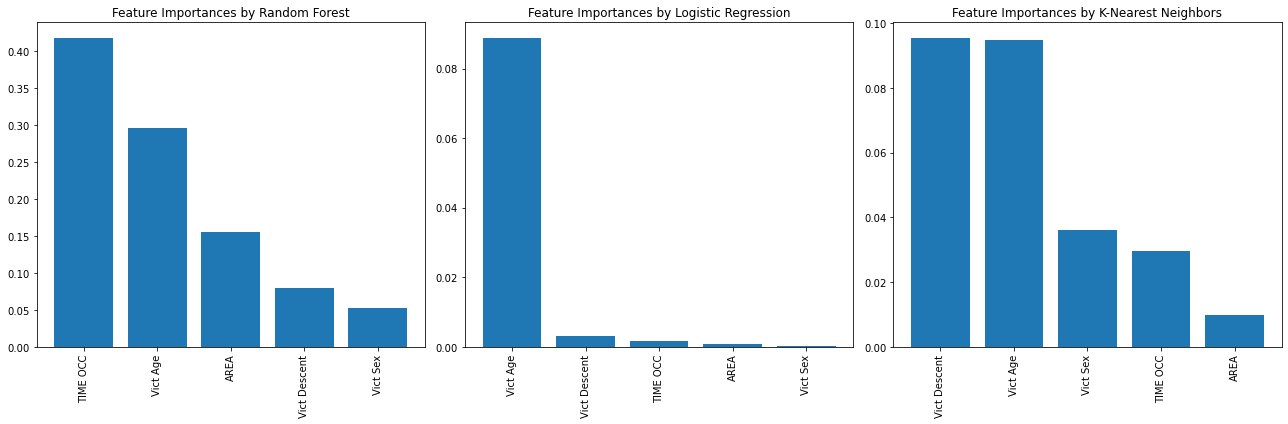

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

axes[0].bar(range(X_train.shape[1]), importances_rf[indices_rf])
axes[0].set_title("Feature Importances by Random Forest")
axes[0].set_xticks(range(X_train.shape[1]))
axes[0].set_xticklabels(X_train.columns[indices_rf], rotation=90)

axes[1].bar(range(X_train.shape[1]), importances_lr.importances_mean[indices_lr])
axes[1].set_title("Feature Importances by Logistic Regression")
axes[1].set_xticks(range(X_train.shape[1]))
axes[1].set_xticklabels(X_train.columns[indices_lr], rotation=90)

axes[2].bar(range(X_train.shape[1]), importances_knn.importances_mean[indices_knn])
axes[2].set_title("Feature Importances by K-Nearest Neighbors")
axes[2].set_xticks(range(X_train.shape[1]))
axes[2].set_xticklabels(X_train.columns[indices_knn], rotation=90)

plt.tight_layout()
plt.show()

In [9]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
print(grid_search.best_params_)


Fitting 3 folds for each of 9 candidates, totalling 27 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


{'max_depth': 10, 'n_estimators': 50}


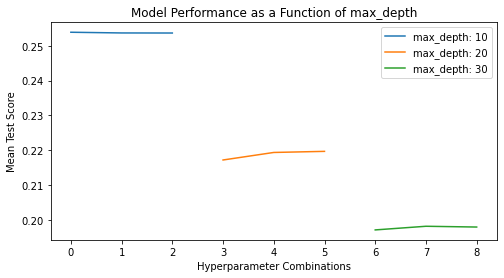

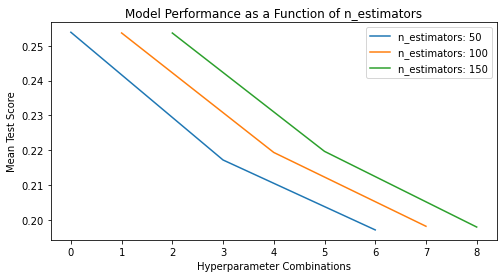

[CV] END ......................max_depth=10, n_estimators=50; total time=   2.7s
[CV] END ......................max_depth=10, n_estimators=50; total time=   3.3s
[CV] END ......................max_depth=10, n_estimators=50; total time=   3.3s
[CV] END .....................max_depth=10, n_estimators=100; total time=   5.2s
[CV] END .....................max_depth=10, n_estimators=100; total time=   6.2s
[CV] END .....................max_depth=10, n_estimators=100; total time=   6.2s
[CV] END ......................max_depth=20, n_estimators=50; total time=   6.7s
[CV] END ......................max_depth=20, n_estimators=50; total time=   6.8s
[CV] END ......................max_depth=20, n_estimators=50; total time=   6.9s
[CV] END .....................max_depth=10, n_estimators=150; total time=   8.8s
[CV] END .....................max_depth=10, n_estimators=150; total time=   9.1s
[CV] END .....................max_depth=10, n_estimators=150; total time=   9.2s
[CV] END ...................

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

results = pd.DataFrame(grid_search.cv_results_)

param_names = [key.replace("param_", "") for key in results.columns if key.startswith("param_")]

for param_name in param_names:
    unique_values = results[f'param_{param_name}'].unique()
    plt.figure(figsize=(8, 4))

    for value in unique_values:
        subset = results[results[f'param_{param_name}'] == value]
        plt.plot(subset['mean_test_score'], label=f'{param_name}: {value}')

    plt.title(f'Model Performance as a Function of {param_name}')
    plt.xlabel('Hyperparameter Combinations')
    plt.ylabel('Mean Test Score')
    plt.legend()
    plt.show()


In [56]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

best_accuracy = accuracy_score(y_test, y_pred_best)
best_precision = precision_score(y_test, y_pred_best, average='weighted', zero_division=0)
best_recall = recall_score(y_test, y_pred_best, average='weighted', zero_division=0)
best_f1 = f1_score(y_test, y_pred_best, average='weighted', zero_division=0)

print("Best Model Metrics:")
print("Accuracy:", best_accuracy)
print("Precision:", best_precision)
print("Recall:", best_recall)
print("F1 Score:", best_f1)


Best Model Metrics:
Accuracy: 0.25491213761399867
Precision: 0.25257633113819644
Recall: 0.25491213761399867
F1 Score: 0.2040514010516172
